Paso 1. importar los datasets utilizados.

Primero importaremos las librerías correspondiente. Luego de esto leemos el archivo como valores separados por comas (ambos son CSV, de acuerdo a la terminación de los archivos).

In [1]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Leemos los archivos
company_trips = pd.read_csv("C:/Users/divad/Downloads/Cosas de ciencias de datos/moved_project_sql_result_01.csv")
avg_trips= pd.read_csv("C:/Users/divad/Downloads/Cosas de ciencias de datos/moved_project_sql_result_04.csv")
trips_loop_airport= pd.read_csv("C:/Users/divad/Downloads/Cosas de ciencias de datos/moved_project_sql_result_07.csv")

Paso 2. Estudiar los datos que contienen y observar los tipos de datos que contienen y si es necesario cambiarlos.


Se imprimen las primeras filas para verificar cual es el delimitador de los archivos, como están los nombres de las columnas, entre otras cosas. Se lee la información general usando el método "info()", observando la presencia de datos nulos y el tipo de datos que tenemos en los data frames.

In [3]:
#Mostramos la información del Data frame de company_trips ()
display(company_trips)
company_trips.info()
company_trips.describe()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Observamos que los datos del Dataframe tienen dos columnas: company_name y trips_amount. La primera tiene datos de tipo objeto y la segunda int64. Tiene sentido considerando que la primera columna guarda los nombres de las compañías y la segunda guarda la cantidad de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. No se observan datos nulos. Usando describe() observamos que el promedio de los viajes por compañía es de 2145.48. El mínimo de viajes en una compañia que encontramos es de 2 viajes y el maximo es de 19558.

In [4]:
#Mostramos la información del Data frame de avg_trips ()
display(avg_trips)
avg_trips.info()
avg_trips.describe()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Observamos que los datos del Dataframe tienen dos columnas: droppoff_location_name y average_trips. La primera tiene datos de tipo objeto y la segunda float64. Tiene sentido considerando que la primera columna guarda los nombres de los barrios de Chicago donde finalizaron los viajes y la segunda guarda el promedio de viajes que terminaron en cada barrio en noviembre de 2017, donde no necesariamente tendremos datos enteros. No se observan datos nulos. Usando describe() observamos que el promedio de los promedios de viajes es de 599.943728. El mínimo de promedios que encontramos es de 1.8 viajes y el maximo es de 10727.466667.

In [5]:
#Mostramos la información del Data frame de trips_loop_airport
display(trips_loop_airport)
trips_loop_airport.info()
trips_loop_airport.describe()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Observamos que los datos del Dataframe tienen ters columnas: start_ts, weather_conditions y duration_seconds. La primera tiene datos de tipo objeto, la segunda de igual manera tipo objeto y la tercera de tipo float64. La primera columna debería ser pasada al tipo datetime para poder llevar a cabo nuestro análisis, considerando que tiene datos de fecha y tiempo. La segunda también debería ser pasada a números inter64, ya que los datos de segundos son números enteros, sin embargo en este ejercicio no se hará esto. No se observan datos nulos. Usando describe() observamos que el promedio de la duración de los viajes es de 2071.731273. El mínimo de promedios que encontramos es de 0 segundos (de seguro es un viaje cancelado) y el máximo es de 7440 (alrededor de 2 horas).

In [6]:
#Transformación de los datos del Data frame de trips_loop_airport

#Cambiando el tipo de datos a datetime
trips_loop_airport["start_ts"]=pd.to_datetime(trips_loop_airport["start_ts"])

#Observamos el cambio
trips_loop_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Paso 3. Identificaremos los 10 principales barrios en términos de finalización del recorrido.

Usando el datafram de avg_trips, observaremos los 10 principales barrios donde se finalizan los recorridos. Usaremos display(), head(), y sort_values para mostrar los 10 principales barrios.

In [7]:
top_avg_trips =avg_trips.sort_values(by='average_trips', ascending=False).head(10)
display(top_avg_trips )

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Entre los 10 principales barrios tenemos: Loop, River North, Streeterville, West Loop, O´Hare, Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul.

Paso 3. hacer gráficos: El primero sobre las empresas de taxis y el número de viajes y el segundo sobre los 10 barrios principales por número de finalizaciones.

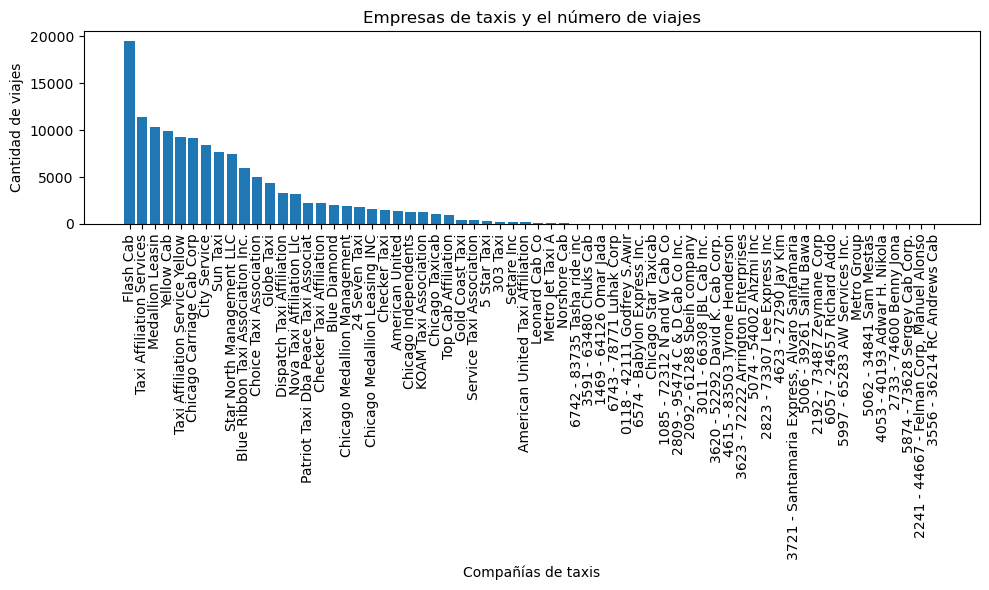

In [8]:
#Gráfica de empresas y número de viajes
plt.figure(figsize=(10, 6))
plt.bar(company_trips['company_name'], company_trips['trips_amount'])
plt.xlabel('Compañías de taxis')
plt.ylabel('Cantidad de viajes')
plt.title('Empresas de taxis y el número de viajes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

De las 64 compañias, la distribución de viajes no es equitativa, siendo Flash Cab quien casi tiene el doble de viajes que la compañia que está en segundo lugar (Taxi Affiliation Services). Solo de 10 compañías tiene más de 5000 viajes entre el 15 y 16 de noviembre de 2017

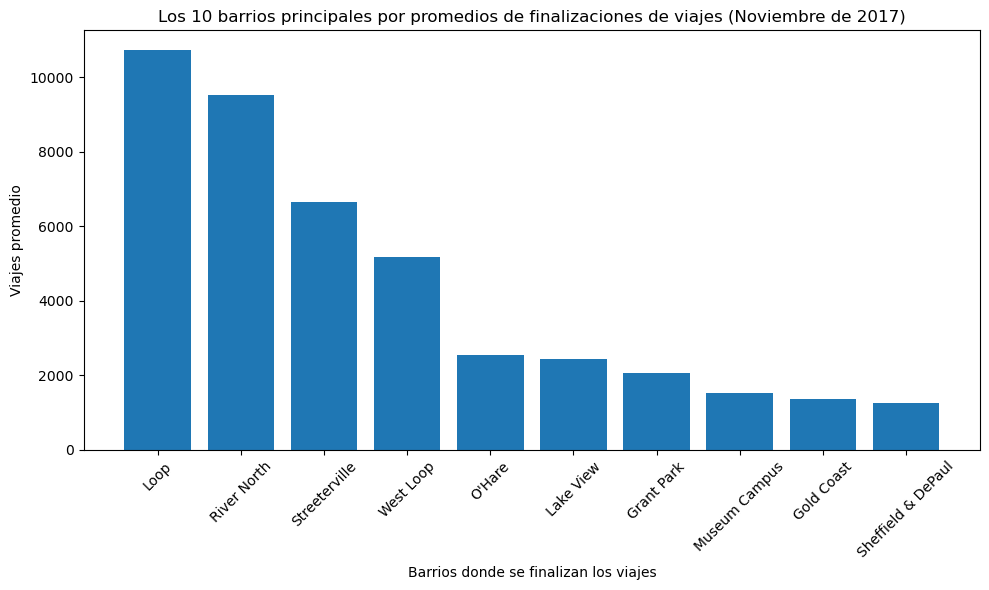

In [9]:
#Gráfica de los 10 barrios principales por número de finalizaciones.
plt.figure(figsize=(10, 6))
plt.bar(top_avg_trips['dropoff_location_name'], top_avg_trips['average_trips'])
plt.xlabel('Barrios donde se finalizan los viajes')
plt.ylabel('Viajes promedio')
plt.title('Los 10 barrios principales por promedios de finalizaciones de viajes (Noviembre de 2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Entre los 10 principales barrios tenemos: Loop, River North, Streeterville, West Loop, O´Hare, Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul, siendo Loop, River North, Streeterville y West Loop quienes están por encima de los 4000 viajes promedios finalizados.

Paso 4. Prueba de hipótesis.

Queremos probar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Tendremos un alfa de 0.05. Usaremos el dataframe de trips_loop_airport. Para esto será necesario obtener los días de la semana por separado y filtrar por los sábados (Qué son el número 5).

In [15]:
trips_loop_airport['day_of_week'] = trips_loop_airport['start_ts'].dt.dayofweek
sat = trips_loop_airport[trips_loop_airport['day_of_week'] == 5]
sat_rain=trips_loop_airport[trips_loop_airport["weather_conditions"]=="Bad"]
display(sat_rain)

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5
1032,2017-11-18 10:00:00,Bad,1908.0,5
1053,2017-11-18 12:00:00,Bad,2400.0,5
1061,2017-11-18 16:00:00,Bad,2186.0,5


Volviendo a nuestra hipótesis, para verificarla haremos una prueba de t de student. Para esto primero debemos probar la similitud estadística de las varianzas sobre la duración en segundos, para poder analizar si ambos grupos de datos son iguales.

Para esto tenemos dos hipótesis sobre las varianzas:

-Hipótesis nula (H0): No hay diferencia significativa entre las varianzas deas duraciones de los segundosos de loviajesoen los sábados lluviosos con respecto a en los demás días sin importar las condiciones climáticas C.

-Hipótesis alternativa (H1): Hay una diferencia significativa entre las variande las duraciones de los segundos de los viajes en los sábados lluviosos con respecto a en los demás días sin importar la.s condiciones climáticas. PC.


In [11]:
# Hacemos listas de ambos dataframes para la prueba de Levine.
sat_rain_lv=sat_rain["duration_seconds"].tolist()
trips_loop_airport_lv=trips_loop_airport["duration_seconds"].tolist()

# Hacemos la prueba de Levine.
lv_result=st.levene(sat_rain_lv, trips_loop_airport_lv)

# Determinamos el alpha 
alpha = 0.05 

# Extraemos el valor p
display('valor p: ', lv_result.pvalue) 

# Comparamos el valor p con el umbral
if lv_result.pvalue < alpha: 
    display("Rechazamos la hipótesis nula con respecto a las varianzas")
else:
    display("No podemos rechazar la hipótesis nula con respecto a las varianzas") 

'valor p: '

0.14610061172793845

'No podemos rechazar la hipótesis nula con respecto a las varianzas'

No podemos rechazar la hipótesis de que las varianzas de ambos grupos son iguales. De tal forma que podemos seguir con la prueba de t de student, donde se asume que las varianzas son iguales.

Para esto tenemos dos hipótesis:

-Hipótesis nula (H0): No hay diferencia significativa entre las medias de las duraciones de los segundos de los viajes en los sábados lluviosos con respecto a en los demás días sin importar las condiciones climáticas.

-Hipótesis alternativa (H1): Hay una diferencia significativa entre las medias de las duraciones de los segundos de los viajes en los sábados lluviosos con respecto a en los demás días sin importar las condiciones climáticas.

Realizamos la prueba estadística luego de elegir alpha (asegurandonos de poner "equal_var=True", para que se relice la prueba de t de student).

In [12]:
# Prueba de T de student 
results = st.ttest_ind(sat_rain_lv, trips_loop_airport_lv, equal_var=True)

# Extraemos el valor p
display('valor p: ', results.pvalue)

# Comparamos el valor p con el umbral
if results.pvalue < alpha: 
    display("Rechazamos la hipótesis nula con respecto a las medias")
else:
    display("No podemos rechazar la hipótesis nula con respecto a las medias")   

'valor p: '

9.19867542516908e-09

'Rechazamos la hipótesis nula con respecto a las medias'

Rechazamos la hipótesis de que las medias de ambos grupos son iguales. No podemos afirmar que no hay diferencias significativas en los promedios entre las duraciones de los viajes en los sábados lluviosos con respecto a en los demás días sin importar las condiciones climáticas. 

Conlusión.

Hay una clara diferencia entre las compañías con mayor número de viajes, siendo la principal Flash Cab. De las 64, solo 10 compañías tenían más de 5000 viajes entre los días 15 y 16 de Novimebre del 2017. Esto podría deberse a ciertos factores: disponibilidad de vehículos para hacer los viajes, relación calidad/precio, facilidad de pedir los viajes (traves de una aplicación, por ejemplo), visibilidad de la compañia (que tan conocida es por los usuarios), etc.

Entre los 10 principales barrios tenemos: Loop, River North, Streeterville, West Loop, O´Hare, Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul. Estos sitios podrían estar muy aglomerados, con distintos lugares como hoteles, residencias, escuelas, lugares de entretenimiento y demás que los hacen lugares muy concurridos con respecto a las finalizaciones de los viajes.

De acuerdo a nuestra hipótesis estadística, no podemos afirmar que no hay diferencias significativas en los promedios entre las duraciones de los viajes en los sábados lluviosos con respecto a en los demás días sin importar las condiciones climáticas. Lo cual podría ser explicado a que habría una disminución de personas que deseen movilizarse por distancias cortas, lo cual afectaría al promedio de la duración en segundos con respecto a los demás días.